In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("E:\Blanco_Avesh")

In [3]:
import os
import pandas as pd
import numpy as np

Header_name = ["PID","Position","Lysine (K)"]

col_of_feature = [i for i in range(1,1025)]

Header_name = Header_name + col_of_feature

df_test = pd.read_csv("GPS_Testing_Prot_T5_feature.txt", header=None)

df_test.columns = Header_name

test_lable = np.array([1]*71+[0]*1377)

df_test_numpy = df_test.iloc[:,3:]
test = np.array(df_test_numpy)

y_independent = test_lable

print(len(y_independent))

X_independent = test

print(X_independent.shape,y_independent.shape)

X_independent = test

1448
(1448, 1024) (1448,)


In [4]:
model_ANN_trained_GPS_TRAINING_DATA = tf.keras.models.load_model('GPS_SUMO_Independent_test'+str(82423)+"____"+str(13)+'.h5')

Y_pred = model_ANN_trained_GPS_TRAINING_DATA.predict(X_independent)
Y_pred = (Y_pred > 0.5)

y_pred = np.ravel(Y_pred[:,1:])

y_pred = y_pred.astype(int)


confusion = confusion_matrix(y_independent,y_pred)
print()
print("Matthews Correlation : ",matthews_corrcoef(y_independent, y_pred))
print()
print("Confusion Matrix : \n",confusion_matrix(y_independent, y_pred))
print()
print("Accuracy on test set:   ",accuracy_score(y_independent, y_pred))
print()

cm = confusion_matrix(y_independent, y_pred)

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

mcc = matthews_corrcoef(y_independent, y_pred)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

print()
print("Sensitivity:   ",Sensitivity,"\t","Specificity:   ",Specificity)
print()
print(classification_report(y_independent, y_pred))

46/46 [==============================] - 0s 669us/step

Matthews Correlation :  0.375216768919829

Confusion Matrix : 
 [[1216  161]
 [  19   52]]

Accuracy on test set:    0.8756906077348067


Sensitivity:    0.7323943661971831 	 Specificity:    0.8830791575889615

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1377
           1       0.24      0.73      0.37        71

    accuracy                           0.88      1448
   macro avg       0.61      0.81      0.65      1448
weighted avg       0.95      0.88      0.90      1448



46/46 [==============================] - 0s 696us/step


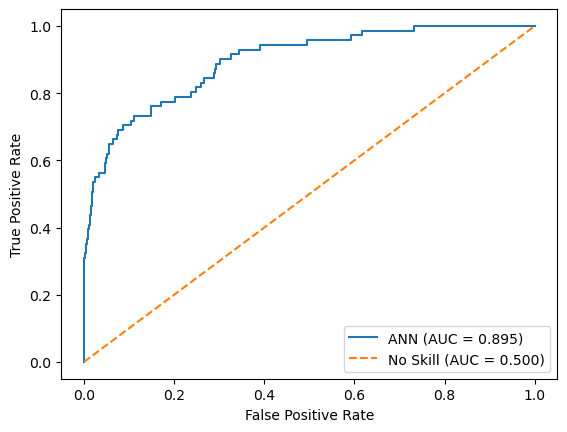

In [5]:
%matplotlib inline
ANN_model_Prob = model_ANN_trained_GPS_TRAINING_DATA.predict(X_independent)
# keep probabilities for the positive outcome only
ANN_model_Prob = ANN_model_Prob[:,1]

ANN_model_Prob_auc = roc_auc_score(y_independent, ANN_model_Prob)

# plot the roc curve for the model
ns_probs = [0 for _ in range(len(ANN_model_Prob))]

# calculate scores
ns_auc = roc_auc_score(y_independent, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_independent, ns_probs)

ANN_model_fpr, ANN_model_tpr, _ = roc_curve(y_independent, ANN_model_Prob)

plt.plot(ANN_model_fpr, ANN_model_tpr,  label='ANN (AUC = %0.3f)' % ANN_model_Prob_auc)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('GPS_SUMO_Sumoylation_ROC.png', dpi=350, bbox_inches='tight')
plt.show()